### Treść zadania

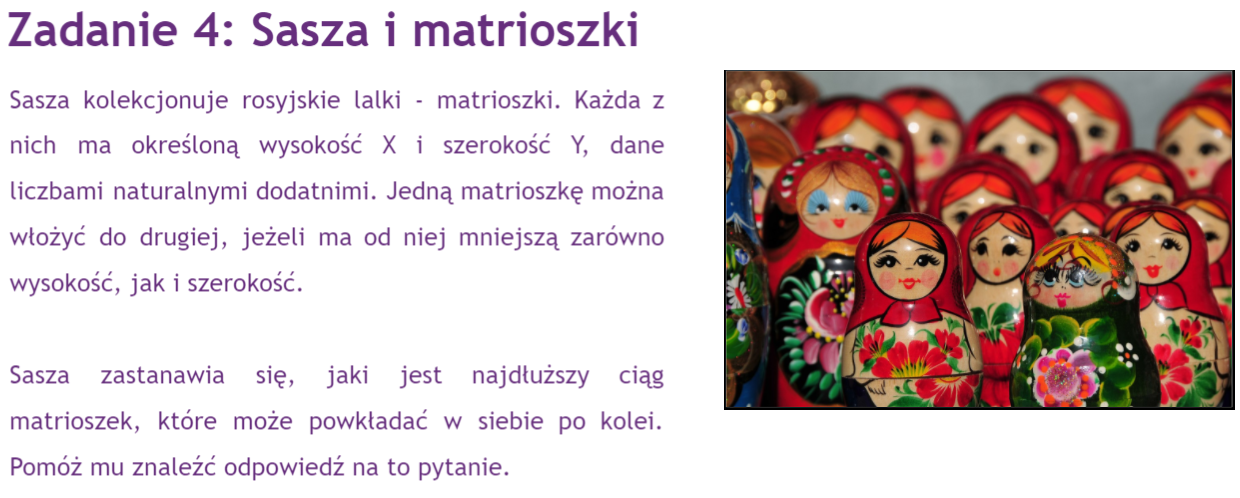

# Sposób I
### (Sortowanie i LIS)

### Omówienie algorytmu

Zauważmy, że gdyby interesował nas tylko jeden wymiar, wystarczyłoby posortować matrioszki w sposób rosnący (zakładam, że najpierw są matrioszki te, które bierzemy wcześniej, a później są te, które nakładamy na poprzednie) (powtórki usuwamy, bo matrioszka o takim samym rozmiarze jak inna nie może wejść w tę matrioszkę). Tutaj problem jest bardziej skomplikowany, ponieważ mamy dwa wymiary. Chciałoby się posortować po obu współrzędnych, jednakże to niewiele da, ponieważ nie mamy pewności, że weźmiemy jakąkolwiek matrioszkę o danej szerokości $ X $, nawet, jeżeli byśmy wzięli tę która ma najmniejszą wysokość $ Y $ (tzn. to, że matrioszka ma mniejszą szerokość, nie oznacza, że jest lepszym wyborem od tej nieco szerszej, ale np. sporo niższej). Z tego powodu konieczne jest użycie algorytmu LIS, ale już na posortowanych według jednego wymiaru matrioszkach. Dzięki temu mamy pewność, że nie popsuje już nam się prawidłowa kolejność matrioszek posortowanych po 1. współrzędnej (szerokości) i wybierzemy zawsze najdłuższy podciąg rosnący (puszczamy LIS-a tylko na 2. współrzędnych - wysokościach, bo szerokości już są ustawione prawidłowo).
###### UWAGA:
Poniższy algorytm pozwala nam tylko na znalezienie długości ciągu matrioszek (bo LIS o złożoności $ O(n \cdot log(n)) $ nadpisuje wartości poprzednich ciągów), a nie jego elementów. Jednak to jest naszym celem, więc nie musimy się tym przejmować.

### Złożoność

###### Obliczeniowa:
$ O(n \cdot log(n)) $  - złożoność sortowania oraz złożoność LIS (wersja z Binary Searchem - patrz tutaj <a href="../../Zadania z wykładu/Programowanie dynamiczne/[Dynamiczne] Najdłuższy rosnący podciąg (niespójny).ipynb/#lis-nlogn">TUTAJ</a>)
###### Pamięciowa:
$ O(n) $

### Implementacja #1
##### (Tylko dla parami różnych wymiarów)

###### UWAGA:
Algorytm w poniższej implementacji jest poprawny jedynie przy założeniu, że wszystkie współrzędne $ X $ lub wszystkie współrzędne $ Y $ są parami różne.

##### Kod:

In [1]:
def binary_search(arr, val, *, fn=lambda x: x):
    left_idx = 0
    right_idx = len(arr) - 1
    
    while left_idx <= right_idx:
        mid_idx = (left_idx + right_idx) // 2
        if fn(val) > fn(arr[mid_idx]):
            left_idx = mid_idx + 1
        else:
            right_idx = mid_idx - 1

    return left_idx  # It will never exceed the left side of an array


def lis(arr, *, fn=lambda x: x):
    if len(arr) < 2: return len(arr)
    
    n = len(arr)
    last = []
    
    for i in range(n):
        print(i, arr[i], last)
        j = binary_search(last, arr[i], fn=fn)
        if j == len(last): last.append(arr[i])
        else: last[j] = arr[i]
    
    return len(last)

        
def matryoshka(D: 'array of matryoshka dolls dimensions'):
    """Returns the length of the longest matryoshka dolls sequence"""
    # Sort all by both coordinates (when X is the same, we will remove
    # the one doll of the larger Y)
    D.sort()
    # Return the length of the LIS on 2nd coordinates
    print(D)
    return lis(D, fn=lambda x: x[1])

###### Kilka testów

In [2]:
D = [(20, 30), (40, 50), (30, 40)]
print(matryoshka(D))

[(20, 30), (30, 40), (40, 50)]
0 (20, 30) []
1 (30, 40) [(20, 30)]
2 (40, 50) [(20, 30), (30, 40)]
3


###### Dla poniższego przypadku nie działa:

In [3]:
from random import shuffle
D = [(1, 2), (3, 3), (10, 1), (2, 5), (3, 4), (4, 2), (4, 8), (10, 10)]
shuffle(D)
print(D)

print('Number of matryoshka dolls:', matryoshka(D))

[(10, 10), (3, 3), (4, 8), (3, 4), (1, 2), (10, 1), (2, 5), (4, 2)]
[(1, 2), (2, 5), (3, 3), (3, 4), (4, 2), (4, 8), (10, 1), (10, 10)]
0 (1, 2) []
1 (2, 5) [(1, 2)]
2 (3, 3) [(1, 2), (2, 5)]
3 (3, 4) [(1, 2), (3, 3)]
4 (4, 2) [(1, 2), (3, 3), (3, 4)]
5 (4, 8) [(4, 2), (3, 3), (3, 4)]
6 (10, 1) [(4, 2), (3, 3), (3, 4), (4, 8)]
7 (10, 10) [(10, 1), (3, 3), (3, 4), (4, 8)]
Number of matryoshka dolls: 5


# Sposób II
### (DAG matrioszek i szukanie najdłuższej ścieżki)

### Omówienie algorytmu

Jeżeli nie przychodzi nam do głowy powyższe rozwiązanie, które jest nieco łatwiejsze i szybsze w implementacji, możemy stworzyć sobie graf skierowany, który będzie reprezentował relację zawieracnia się w sobie matrioszek (tzn. krawędź z danego wierzchołka $ u $, który odpowiada pewnej matrioszce, będzie prowadziła do wierzchołka $ v $ tylko wtedy, gdy matrioszka reprezentowana przez wierzchołek $ v $ będzie mogła zostać włożona do matrioszki $ u $ (lub na odwrót, w zależności w którą stronę skierujemy krawędzie)). Utworzenie grafu zajmie nam $ O(n^2) $ czasu, ale również może zająć $ O(n^2) $ pamięci, dlatego to rozwiązanie nie jest najlepsze. Kolejnym krokiem jest już tylko znalezienie najdłuższej ścieżki w grafie. Ponieważ jest to graf nieważony, i co ważniejsze, jest to DAG (dla nieskierowanego grafu problem jest NP-Trudny), możemy w łatwy sposób wyznaczyć najdłuższą ścieżkę, stosując podejście podobne do <a href="../../../Ćwiczenia/6. Ćwiczenia/Zadania/Zadanie 6 (ścieżka w drzewie).ipynb">TEGO</a> lub postąpić nieco sprytniej i wykorzystać sortowanie topologiczne (patrz <a href="../../Zadania z wykładu/Algorytmy grafowe/[Grafowe] (DFS) Sortowanie topologiczne DAGu.ipynb">TUTAJ</a>) i aktualizować w sposób iteracyjny najlepsze ścieżki w sposób przedstawiony tutaj: https://youtube.com/watch?v=TXkDpqjDMHA. (Obie wersje algorytmu zaimplementowane niżej).
###### UWAGA
Ten algorytm działa również prawidłowo, jeżeli wymiary nie są parami różne.

 ### Złożoność

###### Obliczeniowa:
$ O(n^2) $
###### Pamięciowa:
$ O(n^2) $

### Implementacja #1
##### (Z rekurencyjnym wyznaczaniem najdłuższej ścieżki)

In [15]:
def fits_in(d1, d2):
    """Check if the matryoshka doll of d1 dimentions can be fitted in d2"""
    return d1[0] < d2[0] and d1[1] < d2[1]
    

def create_graph(D: 'array of matryoshka dolls dimensions'):
    n = len(D)
    G = [[] for _ in range(n)]
    
    for i in range(n):
        for j in range(n):
            if i == j: continue
            if fits_in(D[i], D[j]): G[i].append(j)
                
    return G


def longest_path(G: 'DAG'):
    n = len(G)
    # Max lengths of paths starting in u vertex will be stored
    # in an array below
    lengths  = [0] * n
    children = [-1] * n
    visited  = [False] * n
    
    def dfs(u):
        visited[u] = True
        for v in G[u]:
            # Visit if not visited
            if not visited[v]:
                dfs(v)
            if lengths[v] + 1 > lengths[u]:
                lengths[u] = lengths[v] + 1
                children[u] = v
        
    res_u = 0
    for u in range(n):
        if not visited[u]:
            dfs(u)
            length = lengths[u]
            if length > lengths[res_u]:
                res_u = u
                
    return restore_path(children, res_u)


def restore_path(children, u):
    path = []
    while u >= 0:
        path.append(u)
        u = children[u]
    return path

    
def matryoshka(D: 'array of matryoshka dolls dimensions'):
    """
    Returns the longest sequence of matryoshka dolls and the 
    length of this sequence
    """
    G = create_graph(D)
#     print(*G, sep='\n')
    n = len(G)
    path = longest_path(G)
    return path, len(path)

###### Kilka testów

In [19]:
from random import shuffle
D = [(1, 2), (3, 3), (10, 1), (2, 5), (3, 4), (4, 2), (4, 8), (10, 10)]
shuffle(D)
print(D)

ind, length = matryoshka(D)
# Nie zawsze musimy mieć ten sam ciąg, ważne, by był najdłuższy
print('Number of matryoshka dolls:', length)
print('Subsequently put one in another:') 
print(*map(lambda i: D[i], ind))

[(1, 2), (4, 2), (4, 8), (3, 3), (10, 10), (10, 1), (3, 4), (2, 5)]
Number of matryoshka dolls: 4
Subsequently put one in another:
(1, 2) (3, 3) (4, 8) (10, 10)


### Implementacja #2
##### (Z iteracyjnym wyznaczaniem najdłuższej ścieżki i użyciem sortowania topologicznego)

My w tym algorytmie wyznaczamy najdłuższą ścieżkę między dowolnymi wierzchołkami, zatem nie oznaczamy krawędzi jako odwiedzonych, jak ma to miejsce w podlinkowanym algorytmie tutaj: https://youtube.com/watch?v=TXkDpqjDMHA

###### UWAGA:
Ponieważ funkcja $ longest\_pat $', zaimplementowana niżej, działa w taki sposób, że wyznacza wyszystkie najdłuższe ścieżki, ale ich długości zapisuje w końcowych wierzchołkach, największe wartości znajdą się w ujściach grafu skierowanego. Ponieważ nie jesteśmy w stanie normalnie przeglądać grafu skierowanego 'od tyłu', w celu znalezienia najdłuższej ścieżki, będziemy musieli utworzyć graf transponowany (można transponować istniejący graf w miejscu, ale konieczne jest trzymanie listy sąsiadów w postaci listy odsyłaczowej lub struktury, która pozwala na szybkie usuwanie i dodawanie wartości z obu stron - np. deque).

In [6]:
def fits_in(d1, d2):
    """Check if the matryoshka doll of d1 dimentions can be fitted in d2"""
    return d1[0] < d2[0] and d1[1] < d2[1]
    

def create_graph(D: 'array of matryoshka dolls dimensions'):
    n = len(D)
    G = [[] for _ in range(n)]
    
    for i in range(n):
        for j in range(n):
            if i == j: continue
            if fits_in(D[i], D[j]): G[i].append(j)
                
    return G


def topological_sort(G: 'graph represented using adjacency lists'):
    n = len(G)
    visited = [False] * n
    result = [None] * n
    idx = n
    
    def dfs(u):
        visited[u] = True
        for v in G[u]:
            if not visited[v]:
                dfs(v)
        nonlocal idx
        idx -= 1
        result[idx] = u
        
    for u in range(n):
        if not visited[u]:
            dfs(u)
            
    return result
    

def swap(A, i, j):
    A[i], A[j] = A[j], A[i]


def longest_path(G: 'DAG'):
    n = len(G)
    ts = topological_sort(G)
    lengths = [0] * n
    
    for u in ts:
        for v in G[u]:
            lengths[v] = max(lengths[v], lengths[u] + 1)
            
    # Find the starting point
    u = 0
    for i in range(len(lengths)):
        if lengths[i] > lengths[u]:
            u = i
            
    G = get_transposed_graph(G)
        
    return restore_path(G, lengths, u)


def get_transposed_graph(G: 'graph represented using adjacency lists'):
    n = len(G)
    G2 = [[] for _ in range(n)]
    
    for u in range(n):
        for v in G[u]:
            G2[v].append(u)
            
    return G2


def restore_path(G, lengths, u):
    path = [u]
    while lengths[u] > 0:
        print(u)
        # Find the next vertex
        for v in G[u]:
            if lengths[v] == lengths[u] - 1:
                u = v
                break
        path.append(u)
    return path
    
    
def matryoshka(D: 'array of matryoshka dolls dimensions'):
    """
    Returns the longest sequence of matryoshka dolls and the 
    length of this sequence
    """
    G = create_graph(D)
    n = len(G)
    path = longest_path(G)
    return path, len(path)

###### Kilka testów

In [7]:
from random import shuffle

D = [(1, 2), (3, 3), (10, 1), (2, 5), (3, 4), (4, 2), (4, 8), (10, 10)]
shuffle(D)
print(D)

ind, length = matryoshka(D)
# Nie zawsze musimy mieć ten sam ciąg, ważne, by był najdłuższy
print('Number of matryoshka dolls:', length)
print('Subsequently put one in another:') 
print(*map(lambda i: D[i], ind))

[(2, 5), (3, 4), (10, 10), (1, 2), (3, 3), (10, 1), (4, 8), (4, 2)]
3
0
6
Number of matryoshka dolls: 4
Subsequently put one in another:
(1, 2) (2, 5) (4, 8) (10, 10)
